In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict

In [3]:
epoch=mne.read_epochs('C:\\USB Drive\\EpochedEEG\\20140206_1151_epo.fif',preload=True)

Reading C:\USB Drive\EpochedEEG\20140206_1151_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5583 matching events found
Applying baseline correction (mode: mean)
5583 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [4]:
len(epoch.ch_names)

129

In [7]:
epoch.drop_channels(['Lm','VEOG'])

ValueError: Channel(s) Lm, VEOG not found, nothing dropped.

In [8]:
epoch.ch_names

['LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'RE3',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 'LE4',
 'STI 014']

In [9]:
len(epoch.ch_names)

126

In [50]:
epochs=[[]]
i=0
for event in epoch.events[:,-1]:
    if event == 31:
        epochs.append([])
        i=i+1
        epochs[i].append(event)
    else:
        epochs[i].append(event)

In [51]:
epochs

[[131],
 [31, 144, 161, 5, 6, 4, 131, 134],
 [31, 144, 161, 5, 6, 4, 131, 134],
 [31, 144, 161, 5, 6, 4, 131, 134],
 [31, 141, 161, 5, 6, 132, 4, 133],
 [31, 141, 161, 5, 6, 132, 4, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 131, 4, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133, 129],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 144, 161, 5, 6, 131, 4, 134, 129],
 [31, 144, 161, 5, 6, 131, 4, 134],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 131, 4, 134, 131],
 [31, 141, 161, 14, 15, 13, 132, 133],
 [31, 144, 161, 14, 15, 131, 13, 134, 129],
 [31, 141, 161, 14, 15, 132, 13, 133],
 [31, 141, 164, 14, 15, 132, 13, 134],
 [31, 144, 161, 14, 15, 131, 13, 134, 129],
 [31, 144, 164, 14, 15, 131

In [53]:
for events in epochs:
    if  4 in events or 1 in events or 13 in events or 16 in events:
        for i in range(len(events)):
            if i >2:
                events[i]=4
            else:
                events[i]=7
    else:
        for i in range(len(events)):
            if i>2:
                events[i]=5
            else:
                events[i]=7

In [54]:
epochs

[[7],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7, 4, 4, 4, 4, 4, 4],
 [7, 7, 7,

In [57]:
flattened_list = [y for x in epochs for y in x]
for i in range(len(epoch.events)):
    epoch.events[i]=flattened_list[i]

In [60]:
epochs1= epoch[(epoch.events[:,2] == 4) | (epoch.events[:,2] == 5)]

In [61]:
epochs1.events[:,2]

array([4, 4, 4, ..., 4, 4, 4])

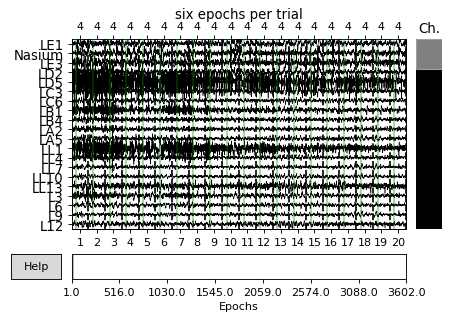

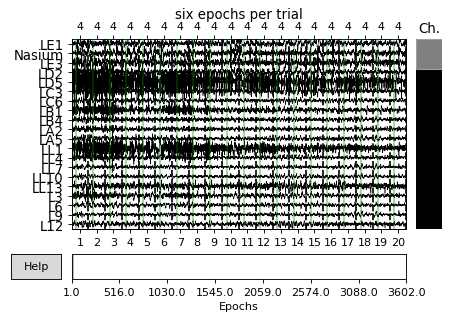

In [62]:
epochs1.plot(title="six epochs per trial")

In [48]:
epochss=[[]]
j=0
for events in epochs:
    for i in range(len(events)):
        if i > 2:
            epochss[j].append(events[i])
    epochss.append([])
    j=j+1

In [33]:
epochs

[[131],
 [5, 6, 4, 131, 134, 4, 131, 134],
 [31, 144, 161, 5, 6, 5, 6, 5],
 [31, 144, 161, 5, 6, 4, 131, 134],
 [31, 141, 161, 5, 6, 132, 4, 133],
 [31, 141, 161, 5, 6, 132, 4, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 131, 4, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133, 129],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 144, 161, 5, 6, 131, 4, 134, 129],
 [31, 144, 161, 5, 6, 131, 4, 134],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 141, 161, 5, 6, 4, 132, 133, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 4, 131, 134, 129],
 [31, 141, 161, 5, 6, 4, 132, 133],
 [31, 144, 161, 5, 6, 131, 4, 134, 131],
 [31, 141, 161, 14, 15, 13, 132, 133],
 [31, 144, 161, 14, 15, 131, 13, 134, 129],
 [31, 141, 161, 14, 15, 132, 13, 133],
 [31, 141, 164, 14, 15, 132, 13, 134],
 [31, 144, 161, 14, 15, 131, 13, 134, 129],
 [31, 144, 164, 14, 15, 131, 13,

In [28]:
epochss

[[]]

In [37]:
list = [5, 6, 4, 131, 134, 4, 131, 134]

In [39]:
array = [[]]
for i in range(len(events)):
        if i > 2:
            array[0].append(event[i])

IndexError: invalid index to scalar variable.

In [46]:
array = [[]]
array[1].append(1)

IndexError: list index out of range

In [45]:
array

[[1]]

In [49]:
epochss

[[],
 [5, 6, 4, 131, 134],
 [5, 6, 4, 131, 134],
 [5, 6, 4, 131, 134],
 [5, 6, 132, 4, 133],
 [5, 6, 132, 4, 133],
 [5, 6, 4, 132, 133],
 [5, 6, 4, 132, 133],
 [5, 6, 131, 4, 134, 129],
 [5, 6, 4, 132, 133, 129],
 [5, 6, 4, 131, 134, 129],
 [5, 6, 131, 4, 134, 129],
 [5, 6, 131, 4, 134],
 [5, 6, 4, 131, 134, 129],
 [5, 6, 4, 132, 133],
 [5, 6, 4, 132, 133],
 [5, 6, 4, 132, 133, 129],
 [5, 6, 4, 132, 133],
 [5, 6, 4, 131, 134, 129],
 [5, 6, 4, 132, 133],
 [5, 6, 131, 4, 134, 131],
 [14, 15, 13, 132, 133],
 [14, 15, 131, 13, 134, 129],
 [14, 15, 132, 13, 133],
 [14, 15, 132, 13, 134],
 [14, 15, 131, 13, 134, 129],
 [14, 15, 131, 13, 133],
 [14, 15, 132, 13, 134],
 [14, 15, 131, 13, 134],
 [14, 15, 131, 13, 133],
 [14, 15, 132, 13, 133],
 [14, 15, 132, 13, 133],
 [14, 15, 131, 13, 134],
 [14, 15, 132, 13, 133, 129],
 [14, 15, 132, 13, 134, 129],
 [14, 15, 131, 13, 134, 129],
 [14, 15, 131, 13, 133],
 [14, 15, 132, 13, 134, 129],
 [14, 15, 13, 132, 134],
 [14, 15, 13, 131, 133],
 [14, 15, 

In [56]:
epochs1= epoch[(epochs.event[:,2] == 4) | (epochs.event[:,2] == 5)]

AttributeError: 'list' object has no attribute 'events'

In [2]:
def get_samples_targets(epochs):
    X = epochs.get_data();
    y = epochs.events[:,-1]
    return X, y

In [3]:
def filter_event_id(epoch): 
    epoch.drop_channels(['Lm','VEOG'])
    epochs=[[]]
    i=0
    for event in epoch.events[:,-1]:
        if event == 31:
            epochs.append([])
            i=i+1
            epochs[i].append(event)
        else:
            epochs[i].append(event)
    for events in epochs:
        if  4 in events or 1 in events or 13 in events or 16 in events:
            for i in range(len(events)):
                if i >2:
                    events[i]=4
                else:
                    events[i]=7
        else:
            for i in range(len(events)):
                if i>2:
                    events[i]=5
                else:
                    events[i]=7
    flattened_list = [y for x in epochs for y in x]
    for i in range(len(epoch.events)):
        epoch.events[i]=flattened_list[i]
    epochs1= epoch[(epoch.events[:,2] == 4) | (epoch.events[:,2] == 5)]
    return epochs1

In [79]:
epoch=filter_event_id(epoch)

In [80]:
epoch.events[:,2]

array([4, 4, 4, ..., 4, 4, 4])

In [4]:
def classify_test_KNN(X,y):

    clf = make_pipeline(Vectorizer(),
                        StandardScaler(),
                        KNN(n_neighbors=11))
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    
    return score

In [83]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_event_id(epochs)
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140206_1029_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
5384 matching events found
Applying baseline correction (mode: mean)
5384 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['20140206_1029_epo.fif', 0.5428296438883542]]
Reading C:\USB Drive\EpochedEEG\run1\20140206_1151_epo.fif ...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\USB Drive\\EpochedEEG\\run1\\20140206_1151_epo.fif'

In [ ]:
scores1 = []

path = 'C:\\USB Drive\\EpochedEEG\\run1'
subject_runs = [f for f in listdir(path) if isfile(join(path, f))]
for f in subject_runs:
    epochs = mne.read_epochs(op.join(path, f),
                          preload=True);
    epochs = filter_event_id(epochs)
    X,y = get_samples_targets(epochs)
    scores1.append([f, classify_test_KNN(X,y)])
    print(scores1)

Reading C:\USB Drive\EpochedEEG\run1\20140207_1146_epo.fif ...
Reading C:\USB Drive\EpochedEEG\run1\20140207_1146_epo.fif ...
Reading C:\USB Drive\EpochedEEG\run1\20140207_1146_epo.fif ...
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
        0 CTF compensation matrices available
        0 CTF compensation matrices available
5398 matching events found
5398 matching events found
Applying baseline correction (mode: mean)
5398 matching events found
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
5398 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
5398 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
[['201402